In [22]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
data_path = r"D:\numerical_method\E94111203_final_project\tainan_east.csv"
data = pd.read_csv(data_path, encoding='utf-8')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   地段位置或門牌  4500 non-null   object 
 1   交易日期     4500 non-null   object 
 2   總價(萬元)   4500 non-null   float64
 3   單價       4500 non-null   float64
 4   總面積      4500 non-null   float64
 5   型態       4500 non-null   object 
 6   屋齡       4147 non-null   float64
 7   樓別/樓高    4497 non-null   object 
 8   交易標的     4500 non-null   object 
 9   交易筆棟數    4500 non-null   object 
 10  建物現況格局   4500 non-null   object 
 11  車位總價     381 non-null    float64
 12  管理組織     4500 non-null   object 
 13  電梯       4500 non-null   object 
 14  主要用途     4469 non-null   object 
 15  備註       2143 non-null   object 
dtypes: float64(5), object(11)
memory usage: 562.6+ KB


In [23]:
#資料預處理
data = data.drop_duplicates()

data.drop('地段位置或門牌',inplace = True,axis=1)
data.drop('交易日期',inplace = True,axis=1)
data.drop('單價',inplace = True,axis=1)
data.drop('型態',inplace = True,axis=1)
data.drop('交易標的',inplace = True,axis=1)
data.drop('交易筆棟數',inplace = True,axis=1)
data.drop('車位總價',inplace = True,axis=1)
data.drop('備註',inplace = True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4365 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   總價(萬元)  4365 non-null   float64
 1   總面積     4365 non-null   float64
 2   屋齡      4025 non-null   float64
 3   樓別/樓高   4362 non-null   object 
 4   建物現況格局  4365 non-null   object 
 5   管理組織    4365 non-null   object 
 6   電梯      4365 non-null   object 
 7   主要用途    4339 non-null   object 
dtypes: float64(3), object(5)
memory usage: 306.9+ KB


In [24]:
#處理缺空值
data['主要用途'].fillna('住宅用',inplace=True)
data.dropna(subset=['建物現況格局'],inplace=True)
#處理離群值
s = data['總價(萬元)'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*1.5
lower_lim = s['25%'] + IQR*1.5
data = data[data['總價(萬元)'] < upper_lim]
s = data['總面積'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*1.5
lower_lim = s['25%'] + IQR*1.5
data = data[data['總面積'] < upper_lim]


Text(0, 0.5, 'quantity')

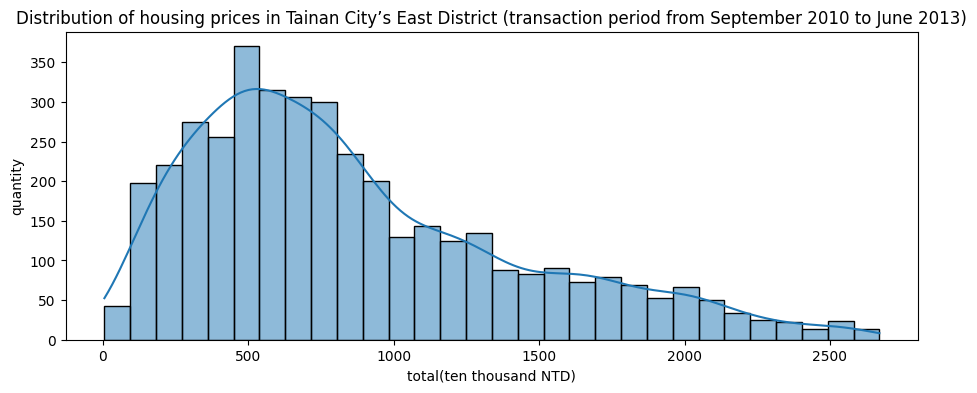

In [25]:
#台南市東區房價分布(交易時間110年9月-113年6月) 

plt.figure(figsize=(11,4))
sns.histplot(data['總價(萬元)'], kde=True)

plt.title('Distribution of housing prices in Tainan City’s East District (transaction period from September 2010 to June 2013)')
plt.xlabel('total(ten thousand NTD)')
plt.ylabel('quantity')

In [26]:
#用途
data.loc[data['主要用途'].isin(['住家用\)']),'主要用途'] = '住家用'
data.loc[~data['主要用途'].isin(['住家用','住商用','商業用','辦公用','其他']),'主要用途'] = '其他'

#樓別/樓高
data['樓別'] = data['樓別/樓高'].str.split('/',expand=True)[0]
data['樓高'] = data['樓別/樓高'].str.split('/',expand=True)[1]
data.drop(['樓別/樓高'],axis=1,inplace=True)

In [27]:
data.樓別.unique()

array(['全', '六層', '四層', '一層', '八層', '五層', '二層', '三層', '十一層', '一層,騎樓',
       '一層,二層', '十層', '七層', '八層,九層', '十二層', '四層,走廊', '十九層', '十四層', '九層',
       '十七層', '八層,通道', '十二層,十三層', '三層,夾層', '十三層', '六層,七層',
       '一層,二層,屋頂突出物,夾層', '五層,夾層', '一層,騎樓,夾層', '十五層', '二十二層', '四層,電梯樓梯間',
       '一層,見其他登記事項', '一層,二層,三層', '一層,二層,夾層', '十八層', '一層,二層,騎樓', '二十三層',
       '九層,十層', '七層,騎樓', '二層,三層', '二層,三層,四層', '一層,二層,三層,騎樓', '四層,五層',
       '二十層', '二層,三層,四層,五層', '七層,八層', '地下層', '十六層', '九層,十層,走廊',
       '一層,騎樓,地下層', '三層,電梯樓梯間', '一層,二層,三層,屋頂突出物', '一層,騎樓,地下一層', '一層,夾層',
       '二層,三層,屋頂突出物', '三層,四層', '七層,夾層', '一層,地下一層', '二層,走廊', '三層,走廊',
       '二十一層', '十三層,走廊', '一層,夾層,見其他登記事項', '六層,夾層', '五層,走廊', '五層,電梯樓梯間',
       '一層,二層,騎樓,夾層', nan, '二層,電梯樓梯間', '一層,二層,三層,騎樓,門廳', '地下一層',
       '一層,電梯樓梯間', '十五層,十六層', '十一層,通道', '地下三層', '三層,騎樓', '一層,夾層,地下層',
       '十一層,十二層', '五層,屋頂突出物', '一層,二層,騎樓,地下層', '六層,騎樓', '四層,五層,屋頂突出物',
       '十四層,夾層', '一層,二層,三層,四層,屋頂突出物,騎樓'], dtype=object)

In [28]:
data['樓別'] = data['樓別'].astype(str).fillna('')
other_levels = [
    '九層,十層', '七層,騎樓', '二層,三層', '二層,三層,四層', '一層,二層,三層,騎樓',
    '四層,五層', '二十層', '二層,三層,四層,五層', '七層,八層', '十六層',
    '九層,十層,走廊', '一層,騎樓,地下層', '三層,電梯樓梯間', '一層,二層,三層,屋頂突出物',
    '一層,騎樓,地下一層', '一層,夾層', '一層,騎樓,夾層', '二層,三層,屋頂突出物',
    '三層,四層', '七層,夾層', '一層,地下一層', '二層,走廊', '一層,見其他登記事項',
    '三層,走廊', '二十一層', '十三層,走廊', '一層,夾層,見其他登記事項', '六層,夾層',
    '五層,走廊', '五層,電梯樓梯間', '一層,二層,騎樓,夾層', '二層,電梯樓梯間',
    '一層,二層,三層,騎樓,門廳', '一層,電梯樓梯間', '十五層,十六層', '十一層,通道',
    '三層,騎樓', '一層,夾層,地下層', '十一層,十二層', '五層,屋頂突出物',
    '一層,二層,騎樓,地下層', '地下層', '六層,騎樓', '四層,五層,屋頂突出物',
    '十四層,夾層', '地下一層', '一層,二層,三層,四層,屋頂突出物,騎樓'
]

data.loc[data['樓別'].isin(other_levels), '樓別'] = '其他'

# 使用 lambda 函數分類 '樓別'
data['樓別'] = data['樓別'].apply(
    lambda x: '地下' if '地下' in x
    else '其他' if x == '其他'
    else '全層' if x in ['全', '一層,二層,騎樓', '一層,二層,夾層', '一層,二層,三層', '一層,二層,屋頂突出物,夾層']
    else '低層' if x in ['一層', '五層', '二層', '三層', '一層,騎樓', '一層,二層', '四層,走廊', '三層,夾層']
    else '中層' if x in ['六層', '八層', '十層', '七層', '八層,九層', '十二層', '十四層', '九層', '八層,通道', '十二層,十三層', '十三層', '六層,七層', '十五層']
    else '高層'
)

print(data['樓別'].value_counts())

樓別
低層    1162
中層    1118
全層    1060
高層     555
其他     135
地下       1
Name: count, dtype: int64


In [29]:
data.樓高.unique()

array(['三層', '一層', '四層', '七層', '五層', '十六層', '十層', '八層', '十二層', '十四層',
       '二層', '十一層', '二十層', '六層', '九層', '十五層', '十八層', '十三層', '二十四層',
       '二十二層', '二十五層', '二十三層', '二十一層', '十七層', '--', nan, '十九層'],
      dtype=object)

In [30]:
data['樓高'] = data['樓高'].astype(str).fillna('')

data['樓高'] = data['樓高'].apply(
    lambda x: '低層' if x in ['一層','二層','三層', '四層','五層' ]
    else '中層' if x in ['六層', '八層', '十層', '七層', '九層', '十二層', '十四層', '九層', '八層', '十三層', '十一層', '十五層']
    else '高層'
)

print(data['樓高'].value_counts())

樓高
中層    1971
低層    1700
高層     360
Name: count, dtype: int64


In [31]:
#佈局
data['房'] = data['建物現況格局'].str.split('房',expand=True)[0]
data['廳'] = data['建物現況格局'].str.split('房',expand=True)[1].str.split('廳',expand=True)[0]
data['衛'] = data['建物現況格局'].str.split('房',expand=True)[1].str.split('廳',expand=True)[1].str.split('衛',expand=True)[0]
data.drop('建物現況格局',axis=1,inplace=True)

In [32]:
# 使用均值填充 '屋齡' 列的缺失值
house_year_mean = data['屋齡'].mean()
data['屋齡'].fillna(house_year_mean, inplace=True)

# 查看填充后的數據
#print(data['屋齡'])


In [33]:
#one_hot encoding
data_encoded = pd.get_dummies(data, columns=['主要用途'])

#label encoding
#print(data_encoded.isnull().sum())
code_dict = {'地下':0,'其他':1,'低層':2,'中層':3,'高層':4,'全層':5}
data_encoded['樓別'] = data_encoded['樓別'].map(code_dict)
code_dict = {'低層':0,'中層':1,'高層':2}
data_encoded['樓高'] = data_encoded['樓高'].map(code_dict)
code_dict = {'無':0,'有':1}
data_encoded['電梯'] = data_encoded['電梯'].map(code_dict)
code_dict = {'無':0,'有':1}
data_encoded['管理組織'] = data_encoded['管理組織'].map(code_dict)
print(data_encoded)


      總價(萬元)    總面積    屋齡  管理組織  電梯  樓別  樓高  房  廳  衛  主要用途_住商用  主要用途_住家用  \
0     1280.0  37.21  46.0     0   0   5   0  6  2  4     False      True   
1     1300.0  15.17  64.0     0   0   5   0  3  1  1     False      True   
2     2570.0  72.13  19.0     0   0   5   0  4  2  4     False      True   
3     1860.0  57.25  22.0     0   0   5   0  4  2  4     False      True   
4      325.0  15.70  32.0     1   1   3   1  1  1  1     False      True   
...      ...    ...   ...   ...  ..  ..  .. .. .. ..       ...       ...   
4495   153.0   7.40  41.0     1   1   2   1  1  0  1     False     False   
4496   153.0   8.95  41.0     1   1   2   1  1  0  1     False     False   
4497   526.0  20.19  17.0     1   1   2   1  1  1  1     False      True   
4498  2500.0  76.06   9.0     0   0   5   0  4  2  5      True     False   
4499   860.0  33.04  42.0     0   0   5   0  4  2  2     False      True   

      主要用途_其他  主要用途_商業用  主要用途_辦公用  
0       False     False     False  
1       False  

In [34]:
data_encoded = data_encoded.drop(['主要用途_其他'],axis=1) #刪除出現最少次數


In [35]:
X = data_encoded.drop(['總價(萬元)'],axis=1)
y = data['總價(萬元)']


#使用隨機森林模型來訓練
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rfModel = RandomForestRegressor(n_estimators=100,random_state=42)
rfModel.fit(X_train, y_train)

y_pred = rfModel.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


0.805691566899051


In [36]:
from sklearn.model_selection import cross_val_score
rfModel_cv = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rfModel_cv, X, y, cv=5, scoring='r2')
print("R2 score : %0.10f(+/- %0.10f)" % (scores.mean(),scores.std()*2))

R2 score : 0.7647958606(+/- 0.0437672204)


In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", rmse, "萬")

RMSE:  253.0963799667746 萬


In [38]:
X.columns

Index(['總面積', '屋齡', '管理組織', '電梯', '樓別', '樓高', '房', '廳', '衛', '主要用途_住商用',
       '主要用途_住家用', '主要用途_商業用', '主要用途_辦公用'],
      dtype='object')

In [39]:
test= np.array(
[63.32,
 3, 
 1,
 1, 
 2, 
 1,
 3, 
 2,
 2, 
 0,
 1, 
 0,
 0]).reshape(1,13) 

test_reshaped = test.reshape(-1, 1)

In [40]:
#預測房價

price_pred = rfModel.predict(test)
print("預估價格為: %0.2f萬" % (price_pred))
print("誤差範圍介於: %0.2f 萬 到 %0.2f 萬元之間" % (price_pred-rmse,price_pred+rmse))

預估價格為: 1680.54萬
誤差範圍介於: 1427.45 萬 到 1933.64 萬元之間


c:\Users\書\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:

# GUI部分
import tkinter as tk
from tkinter import messagebox
def predict_price():
    try:
        total_area = float(total_area_entry.get())
        room = int(room_entry.get())
        hall = int(hall_entry.get())
        bath = int(bath_entry.get())
        age = float(age_entry.get())
        level = int(level_entry.get())
        height = int(height_entry.get())
        elevator = int(elevator_entry.get())
        manage_org = int(manage_org_entry.get())
        usage_residential = int(usage_residential_entry.get())
        usage_mixed = int(usage_mixed_entry.get())
        usage_commercial = int(usage_commercial_entry.get())
        usage_office = int(usage_office_entry.get())
        level = int(level_entry.get())
        height = int(height_entry.get())
        
        
        test = np.array([
            total_area, room, hall, bath, age, level, height, elevator, manage_org, usage_residential, 
            usage_mixed, usage_commercial, usage_office
        ]).reshape(1, -1)
        
        price_pred = rfModel.predict(test)[0]
        messagebox.showinfo("Prediction", f"預估價格為: {price_pred:.2f} 萬\n誤差範圍介於: {price_pred-rmse:.2f} 萬 到 {price_pred+rmse:.2f} 萬元之間")
    except ValueError:
        messagebox.showerror("Input Error", "請確保所有輸入均為有效數字")

# 建立Tkinter視窗
root = tk.Tk()
root.title("房價預測")

tk.Label(root, text="總面積").grid(row=0, column=0)
total_area_entry = tk.Entry(root)
total_area_entry.grid(row=0, column=1)

tk.Label(root, text="房").grid(row=1, column=0)
room_entry = tk.Entry(root)
room_entry.grid(row=1, column=1)

tk.Label(root, text="廳").grid(row=2, column=0)
hall_entry = tk.Entry(root)
hall_entry.grid(row=2, column=1)

tk.Label(root, text="衛").grid(row=3, column=0)
bath_entry = tk.Entry(root)
bath_entry.grid(row=3, column=1)

tk.Label(root, text="屋齡").grid(row=4, column=0)
age_entry = tk.Entry(root)
age_entry.grid(row=4, column=1)

tk.Label(root, text="電梯 (0: 無, 1: 有)").grid(row=5, column=0)
elevator_entry = tk.Entry(root)
elevator_entry.grid(row=5, column=1)

tk.Label(root, text="管理組織 (0: 無, 1: 有)").grid(row=6, column=0)
manage_org_entry = tk.Entry(root)
manage_org_entry.grid(row=6, column=1)

tk.Label(root, text="主要用途 - 住宅用 (0: 無, 1: 有)").grid(row=7, column=0)
usage_residential_entry = tk.Entry(root)
usage_residential_entry.grid(row=7, column=1)

tk.Label(root, text="主要用途 - 住商用 (0: 無, 1: 有)").grid(row=8, column=0)
usage_mixed_entry = tk.Entry(root)
usage_mixed_entry.grid(row=8, column=1)

tk.Label(root, text="主要用途 - 商業用 (0: 無, 1: 有)").grid(row=9, column=0)
usage_commercial_entry = tk.Entry(root)
usage_commercial_entry.grid(row=9, column=1)

tk.Label(root, text="主要用途 - 辦公用 (0: 無, 1: 有)").grid(row=10, column=0)
usage_office_entry = tk.Entry(root)
usage_office_entry.grid(row=10, column=1)

tk.Label(root, text="幾樓(地下:0,其他:1, 1-5樓: 2, 6-15樓: 3, 16樓以上: 4, 整棟: 5)").grid(row=11, column=0)
level_entry = tk.Entry(root)
level_entry.grid(row=11, column=1)

tk.Label(root, text="樓高(1-5樓: 0, 6-15樓: 1, 16樓以上: 2)").grid(row=12, column=0)
height_entry = tk.Entry(root)
height_entry.grid(row=12, column=1)

predict_btn = tk.Button(root, text="預測價格", command=predict_price)
predict_btn.grid(row=13, column=0, columnspan=2)

root.mainloop()

c:\Users\書\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
